In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indic

In [2]:
df = pd.read_csv('prepd-data.csv')
df.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Region
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
2,2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,None,China
3,3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",None,China
4,4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,None,China


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270765 entries, 0 to 270764
Data columns (total 16 columns):
Unnamed: 0    270765 non-null int64
ID            270765 non-null int64
Name          270765 non-null object
Sex           270765 non-null object
Age           270765 non-null float64
Height        270765 non-null float64
Weight        270765 non-null float64
Team          270765 non-null object
NOC           270765 non-null object
Year          270765 non-null int64
Season        270765 non-null object
City          270765 non-null object
Sport         270765 non-null object
Event         270765 non-null object
Medal         270765 non-null object
Region        270765 non-null object
dtypes: float64(3), int64(3), object(10)
memory usage: 33.1+ MB


In [4]:
x = df[['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'City', 'Sport', 'Event']].values
y = df['Medal'].values
print(x[:10])
print(y[:10])

[['M' 24.0 180.0 80.0 'CHN' 1992 'Summer' 'Barcelona' 'Basketball'
  "Basketball Men's Basketball"]
 ['M' 23.0 170.0 60.0 'CHN' 2012 'Summer' 'London' 'Judo'
  "Judo Men's Extra-Lightweight"]
 ['M' 22.0 182.0 75.0 'CHN' 2000 'Summer' 'Sydney' 'Boxing'
  "Boxing Men's Middleweight"]
 ['M' 25.0 160.0 62.0 'CHN' 2004 'Summer' 'Athina' 'Wrestling'
  "Wrestling Men's Lightweight, Greco-Roman"]
 ['F' 14.0 168.0 54.0 'CHN' 2016 'Summer' 'Rio de Janeiro' 'Swimming'
  "Swimming Women's 200 metres Freestyle"]
 ['F' 14.0 168.0 54.0 'CHN' 2016 'Summer' 'Rio de Janeiro' 'Swimming'
  "Swimming Women's 4 x 200 metres Freestyle Relay"]
 ['M' 22.0 178.0 72.0 'CHN' 2006 'Winter' 'Torino' 'Speed Skating'
  "Speed Skating Men's 500 metres"]
 ['M' 22.0 178.0 72.0 'CHN' 2006 'Winter' 'Torino' 'Speed Skating'
  "Speed Skating Men's 1,000 metres"]
 ['M' 19.0 173.0 70.0 'CHN' 1998 'Winter' 'Nagano'
  'Short Track Speed Skating'
  "Short Track Speed Skating Men's 500 metres"]
 ['M' 19.0 173.0 70.0 'CHN' 1998 'W

In [5]:
le_indices = [0, 4, 6, 7, 8, 9]
std_indices = [1, 2, 3, 5]

le = []
for i in range(len(le_indices)):
    le.append(LabelEncoder())
    le[i].fit(x[:,le_indices[i]])
    x[:,le_indices[i]] = le[i].transform(x[:,le_indices[i]])

std = StandardScaler()
x_std = std.fit_transform(x)

classes = np.unique(y)

ley = LabelEncoder()   
y = ley.fit_transform(y)

print(x_std[:10])
print(y[:10])

ley_name_mapping = dict(zip(classes, ley.transform(classes)))
print(ley_name_mapping)

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[ 0.61549745 -0.25245155  0.42402653  0.6507647  -1.06542753  0.45633602
  -0.4675028  -1.19092679 -1.06341198 -0.98195753]
 [ 0.61549745 -0.41153166 -0.61940473 -0.88757195 -1.06542753  1.12558717
  -0.4675028  -0.19382838  0.17381329  0.15427521]
 [ 0.61549745 -0.57061176  0.63271279  0.26618054 -1.06542753  0.72403648
  -0.4675028   1.55109383 -0.80565672 -0.83396083]
 [ 0.61549745 -0.09337144 -1.66283599 -0.73373829 -1.06542753  0.85788671
  -0.4675028  -1.35710986  1.87499803  1.83475388]
 [-1.62470211 -1.84325263 -0.82809098 -1.34907295 -1.06542753  1.2594374
  -0.4675028   0.63708696  1.30793645  1.45282691]
 [-1.62470211 -1.84325263 -0.82809098 -1.34907295 -1.06542753  1.2594374
  -0.4675028   0.63708696  1.30793645  1.47669734]
 [ 0.61549745 -0.57061176  0.21534028  0.03543004 -1.06542753  0.92481183
   2.1390246   1.7172769   1.2563854   1.1950262 ]
 [ 0.61549745 -0.57061176  0.21534028  0.03543004 -1.06542753  0.92481183
   2.1390246   1.7172769   1.2563854   1.17592985]
 [

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [7]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(5),max_iter=1000,random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[    0     0  3988     0]
 [    0     2  3983     0]
 [    0     1 69368     0]
 [    0     1  3887     0]]

Classification Report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      3988
          1       0.50      0.00      0.00      3985
          2       0.85      1.00      0.92     69369
          3       0.00      0.00      0.00      3888

avg / total       0.75      0.85      0.79     81230


Accuracy: 0.854
CPU times: user 7.65 s, sys: 217 ms, total: 7.87 s
Wall time: 7.59 s


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
%%time
data = []
for i in range(1,100):
    mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=i, random_state=0)
    mlp.fit(x_train, y_train)
    y_pred = mlp.predict(x_test)
    error = mean_squared_error(y_test, y_pred)
    data.append([i, error])

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/l

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 18min, sys: 18.2 s, total: 18min 18s
Wall time: 17min 42s


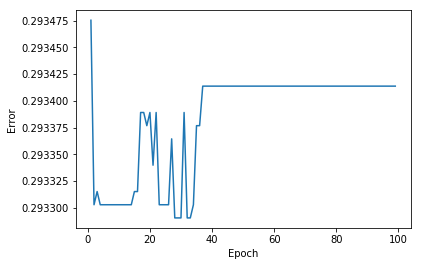

In [9]:
df_error = pd.DataFrame(data, columns = ['Epoch', 'Error'])
sb.lineplot(data=df_error, x='Epoch', y='Error')

In [10]:
df = df.loc[df.Medal!='None']

x = df[['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'City', 'Sport', 'Event']].values
y = df['Medal'].values

le_indices = [0, 4, 6, 7, 8, 9]
std_indices = [1, 2, 3, 5]

le = []
for i in range(len(le_indices)):
    le.append(LabelEncoder())
    le[i].fit(x[:,le_indices[i]])
    x[:,le_indices[i]] = le[i].transform(x[:,le_indices[i]])

std = StandardScaler()
x_std = std.fit_transform(x)

classes = np.unique(y)

ley = LabelEncoder()   
y = ley.fit_transform(y)

ley_name_mapping = dict(zip(classes, ley.transform(classes)))
print(ley_name_mapping)

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

{'Bronze': 0, 'Gold': 1, 'Silver': 2}


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(5),max_iter=1000,random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[2401 1085  553]
 [1860 1560  519]
 [2203 1148  604]]

Classification Report:
             precision    recall  f1-score   support

          0       0.37      0.59      0.46      4039
          1       0.41      0.40      0.40      3939
          2       0.36      0.15      0.21      3955

avg / total       0.38      0.38      0.36     11933


Accuracy: 0.383


In [12]:
%%time
data = []
for i in range(1,1000):
    mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=i, random_state=0)
    mlp.fit(x_train, y_train)
    y_pred = mlp.predict(x_test)
    error = mean_squared_error(y_test, y_pred)
    data.append([i, error])

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/l

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (37) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (38) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 38min 57s, sys: 1min 36s, total: 40min 33s
Wall time: 34min 52s


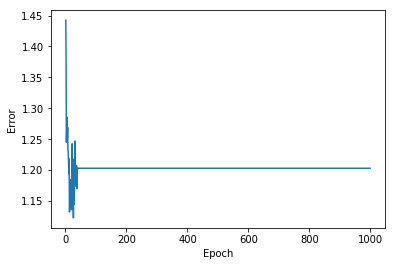

In [13]:
df_error = pd.DataFrame(data, columns = ['Epoch', 'Error'])
sb.lineplot(data=df_error, x='Epoch', y='Error')

In [14]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(100, 50),max_iter=1000,random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[1926  935 1178]
 [1127 1693 1119]
 [1336 1012 1607]]

Classification Report:
             precision    recall  f1-score   support

          0       0.44      0.48      0.46      4039
          1       0.47      0.43      0.45      3939
          2       0.41      0.41      0.41      3955

avg / total       0.44      0.44      0.44     11933


Accuracy: 0.438
CPU times: user 1min 27s, sys: 16.5 s, total: 1min 43s
Wall time: 26.1 s


In [15]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(1000, 100, 50),max_iter=1000,random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[1861  976 1202]
 [ 772 2083 1084]
 [ 923  994 2038]]

Classification Report:
             precision    recall  f1-score   support

          0       0.52      0.46      0.49      4039
          1       0.51      0.53      0.52      3939
          2       0.47      0.52      0.49      3955

avg / total       0.50      0.50      0.50     11933


Accuracy: 0.501
CPU times: user 10min 55s, sys: 1min 55s, total: 12min 50s
Wall time: 3min 19s


In [16]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter=1000, random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[1822 1564  653]
 [1270 2197  472]
 [1691 1585  679]]

Classification Report:
             precision    recall  f1-score   support

          0       0.38      0.45      0.41      4039
          1       0.41      0.56      0.47      3939
          2       0.38      0.17      0.24      3955

avg / total       0.39      0.39      0.37     11933


Accuracy: 0.394
CPU times: user 11.7 s, sys: 179 ms, total: 11.9 s
Wall time: 11.7 s


In [17]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(100, 80, 60, 40, 20),max_iter=1000,random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[2073  907 1059]
 [ 897 2127  915]
 [1068 1034 1853]]

Classification Report:
             precision    recall  f1-score   support

          0       0.51      0.51      0.51      4039
          1       0.52      0.54      0.53      3939
          2       0.48      0.47      0.48      3955

avg / total       0.51      0.51      0.51     11933


Accuracy: 0.507
CPU times: user 4min 3s, sys: 55.1 s, total: 4min 58s
Wall time: 1min 17s


In [18]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(1000, 500, 200, 100, 50),max_iter=1000,random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[2021 1023  995]
 [ 785 2214  940]
 [ 957 1045 1953]]

Classification Report:
             precision    recall  f1-score   support

          0       0.54      0.50      0.52      4039
          1       0.52      0.56      0.54      3939
          2       0.50      0.49      0.50      3955

avg / total       0.52      0.52      0.52     11933


Accuracy: 0.519
CPU times: user 29min 44s, sys: 6min, total: 35min 45s
Wall time: 9min 29s


In [21]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(1000, 1000, 1000, 1000, 1000, 1000, 800, 500, 200, 100), max_iter=1000,random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[2129  901 1009]
 [ 918 2058  963]
 [ 997  918 2040]]

Classification Report:
             precision    recall  f1-score   support

          0       0.53      0.53      0.53      4039
          1       0.53      0.52      0.53      3939
          2       0.51      0.52      0.51      3955

avg / total       0.52      0.52      0.52     11933


Accuracy: 0.522
CPU times: user 3h 48min 33s, sys: 38min 47s, total: 4h 27min 20s
Wall time: 1h 14min
